In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_columns=60

In [3]:
datadir = Path('./data/')

In [4]:
tabular_data_df = pd.read_csv(datadir/'tabular_data.csv')
hashed_feature_df = pd.read_csv(datadir/'hashed_feature.csv')
label_df = pd.read_csv(datadir/'train.csv')

In [5]:
tabular_data_df.shape, hashed_feature_df.shape, label_df.shape

((61272, 52), (266053, 2), (4084, 2))

In [6]:
tabular_data_df.head(2)

,id,period,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,0,1,110.0,55.0,0.432017,0.0,176.78,0.0,0.323712,NaN,147.0,0.0,176.78,55.0,0.248711,0.001373,0.0,0.0,0.0,0.476549,333.60,0.277617,55.0,0.0,55.0,21.0,0.0,f9ae10397ed62e79c644d06842bbcd92963a5927,NaN,0.0,1.00,55.0,93.0,5562.0,93.0,0.040283,182.0,0.0,43.50,0.0,0.0,0.00,0.0,0,0.0,0.0,55.0,2.0,0.526552,145.0,133.28,0.0
1,0,2,110.0,110.0,0.397517,0.0,315.42,0.0,0.316798,NaN,135.0,0.0,315.42,110.0,0.261744,-0.002248,0.0,0.0,0.0,0.210951,428.78,0.290904,110.0,0.0,110.0,26.0,0.0,f9ae10397ed62e79c644d06842bbcd92963a5927,NaN,0.0,0.77,110.0,114.0,5532.0,114.0,0.047588,181.0,0.0,85.45,0.0,0.0,15.75,0.0,0,0.0,0.0,110.0,1.0,0.481063,130.0,229.97,0.0


In [7]:
hashed_feature_df.head(2)

,id,feature_50
0,0,7984b0a0e139cabadb5afc7756d473fb34d23819
1,0,47904b3331202e9881d003ff449c2eabfbc75460


In [8]:
label_df.head(2)

,id,target
0,0,0
1,1,0


In [9]:
label_df['target'].value_counts()

0    3009
1    1075
Name: target, dtype: int64

In [10]:
hashed_feature_df['id'].value_counts()

4517    1278
3503     957
3329     925
4967     774
1885     756
        ... 
3208       1
2145       1
3679       1
3601       1
2226       1
Name: id, Length: 5106, dtype: int64

(array([4.567e+03, 4.060e+02, 8.900e+01, 2.500e+01, 9.000e+00, 6.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([1.0000e+00, 1.2870e+02, 2.5640e+02, 3.8410e+02, 5.1180e+02,
        6.3950e+02, 7.6720e+02, 8.9490e+02, 1.0226e+03, 1.1503e+03,
        1.2780e+03]),
 <BarContainer object of 10 artists>)

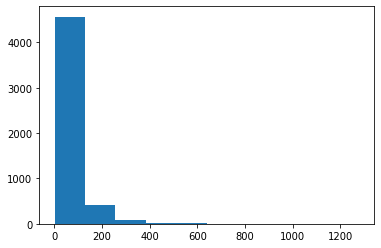

In [11]:
plt.hist(hashed_feature_df['id'].value_counts(), bins=10)

In [12]:
# add feature_50 (count)
tabular_data_df = tabular_data_df.merge(hashed_feature_df.groupby('id').count(), how='left', on='id')

In [13]:
# add target
tabular_data_df=tabular_data_df.merge(label_df, how='left', on='id')

In [14]:
# replace feature25
feat_25 = dict(zip(tabular_data_df['feature_25'].unique(), range(8)))
tabular_data_df['feature_25'].replace(feat_25, inplace=True)

In [15]:
tabular_data_df.drop(columns=['period','feature_31', 'feature_34', 'feature_41', 'feature_44'], inplace=True)

In [16]:
# f10=f36+f48

In [17]:
tabular_data_df['feature_48'] = tabular_data_df.apply(
    lambda row: row['feature_10']-row['feature_36'] if np.isnan(row['feature_48']) else row['feature_48'],
    axis=1
)

In [18]:
tabular_data_df['feature_36'] = tabular_data_df.apply(
    lambda row: row['feature_10']-row['feature_48'] if np.isnan(row['feature_36']) else row['feature_36'],
    axis=1
)

In [19]:
tabular_data_df['feature_10'] = tabular_data_df.apply(
    lambda row: row['feature_36']+row['feature_48'] if np.isnan(row['feature_10']) else row['feature_10'],
    axis=1
)

Train/test split

In [20]:
train_df = tabular_data_df[tabular_data_df['target'].notna()].copy()

In [21]:
train_df.shape

(49008, 49)

In [22]:
test_df = tabular_data_df[tabular_data_df['target'].isna()].copy()

In [23]:
test_df.shape

(12264, 49)

Manage NAs

In [24]:
fill_0 = ['feature_20', 'feature_11', 'feature_29', 'feature_3', 'feature_35', 'feature_42',
         'feature_4', 'feature_10', 'feature_36', 'feature_48', 'feature_5', 'feature_7', 'feature_9',
         'feature_14', 'feature_15', 'feature_16', 'feature_18', 'feature_24', 'feature_26', 'feature_27',
         'feature_30', 'feature_47', 'feature_37', 'feature_38', 'feature_39', 'feature_43', 'feature_45',
         'feature_49']

In [25]:
fill_mean = ['feature_1', 'feature_2', 'feature_6', 'feature_8', 'feature_12', 'feature_13', 'feature_19',
            'feature_23', 'feature_28', 'feature_32', 'feature_33', 'feature_40', 'feature_46']

In [26]:
fill_4 = ['feature_22', 'feature_21']

In [27]:
for col in fill_0:
    train_df[col].fillna(0.0, inplace = True)
    test_df[col].fillna(0.0, inplace = True)

In [28]:
train_mean = train_df[fill_mean].mean()

In [29]:
for col in fill_mean:
    train_df[col].fillna(train_mean[col], inplace = True)
    test_df[col].fillna(train_mean[col], inplace = True)

In [30]:
for col in fill_4:
    train_df[col].fillna(-4.25, inplace = True)
    test_df[col].fillna(-4.25, inplace = True)

In [31]:
train_df['feature_0'].fillna(110., inplace = True)
test_df['feature_0'].fillna(110., inplace = True)

In [32]:
train_df.isna().sum().sum()

0

In [33]:
test_df.isna().sum().sum()

12264

Modelling

In [34]:
import xgboost as xgb
import lightgbm as lgm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [35]:
features = train_df.columns[1:-1]

In [36]:
X = train_df[features]
y = train_df['target']

In [37]:
rf = RandomForestClassifier(n_estimators=300,
                       criterion='gini',
                       max_depth=None,
                       min_samples_split=2,
                       min_samples_leaf=1,
                       min_weight_fraction_leaf=0.0,
                       max_features='auto',
                       max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_impurity_split=None,
                       bootstrap=True,
                       oob_score=False,
                       n_jobs=None,
                       random_state=None,
                       verbose=0,
                       warm_start=False,
                       class_weight=None,
                       ccp_alpha=0.0,
                       max_samples=None,)

In [38]:
rf.fit(X, y)

RandomForestClassifier(n_estimators=300)

In [39]:
test_df['rf_test_preds'] = rf.predict_proba(test_df[features])[:,1]

In [40]:
test_df.head(2)

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_32,feature_33,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_42,feature_43,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,target,rf_test_preds
49008,4084,110.0,77.66,0.494997,0.0,209.00,0.0,0.201109,141.82,35.0,3.27,183.28,77.66,0.181976,0.002610,0.0,0.0,0.000000,0.838393,174.50,0.226795,75.0,2.66,77.66,9.0,0.0,0,20.0,3.27,32.58,60.0,29.0,44.0,0.032862,0.0,62.53,0.0,0.0,0.10,0.87,-0.0,0.0,3.0,0.035053,31.0,120.75,2.0,11,NaN,0.060000
49009,4084,110.0,161.86,0.448919,0.0,193.65,0.0,0.167043,114.73,36.0,1.30,160.38,161.86,0.207897,0.004074,0.0,0.0,16181.098369,0.209477,154.73,0.226795,150.0,11.86,161.86,-8.0,0.0,0,24.0,0.00,33.35,165.0,32.0,47.0,0.045954,0.0,43.25,0.0,0.0,6.65,1.69,-0.0,0.0,2.0,0.037252,29.0,117.13,1.0,11,NaN,0.086667


In [41]:
test_preds = test_df[['id', 'rf_test_preds']].groupby('id').mean().sort_values(by='id')

In [42]:
test_preds

,rf_test_preds
id,
4084,0.086389
4085,0.157222
4086,0.123889
4087,0.253056
4088,0.371944
...,...
5101,0.104444
5102,0.577222
5103,0.146111


(array([ 37.,  79.,  99., 106., 101., 105.,  92.,  82.,  63.,  65.,  43.,
         39.,  33.,  20.,  24.,  15.,   7.,  10.,   1.,   1.]),
 array([0.01444444, 0.05408333, 0.09372222, 0.13336111, 0.173     ,
        0.21263889, 0.25227778, 0.29191667, 0.33155556, 0.37119444,
        0.41083333, 0.45047222, 0.49011111, 0.52975   , 0.56938889,
        0.60902778, 0.64866667, 0.68830556, 0.72794444, 0.76758333,
        0.80722222]),
 <BarContainer object of 20 artists>)

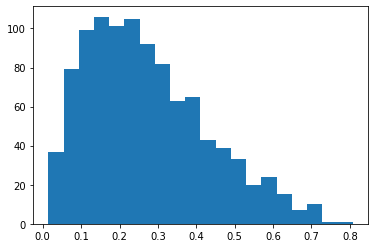

In [43]:
plt.hist(test_preds['rf_test_preds'], bins=20)

In [44]:
(test_preds['rf_test_preds'] < 0.1).sum(), (test_preds['rf_test_preds'] > 0.8).sum()

(138, 1)

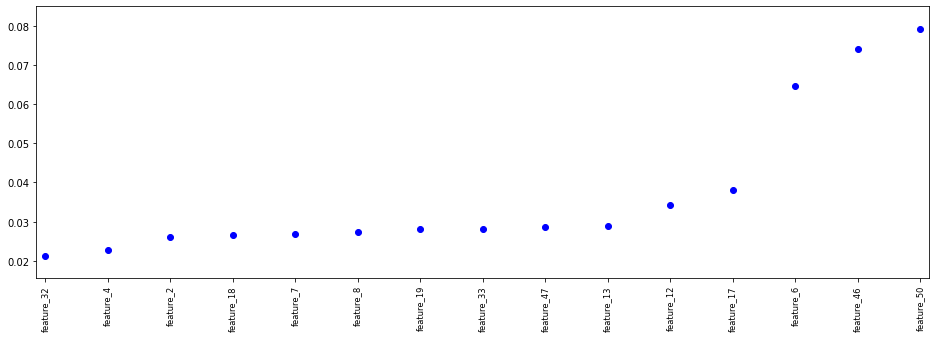

In [45]:
plt.figure(figsize = (16,5))
plt.margins(x=0.01, y=0.1)
plt.plot(rf.feature_importances_[np.argsort(rf.feature_importances_)][-15:], 'bo')
plt.xticks(np.arange(15),
           features[np.argsort(rf.feature_importances_)][-15:],
           fontsize = 'small', rotation = 90);

In [46]:
dtrain = xgb.DMatrix(data=X, label=y, weight=None,
                     base_margin=None, missing=None,
                     silent=False, feature_names=list(features),
                     feature_types=None, nthread=None,)

dtest = xgb.DMatrix(data=test_df[features], label=None, weight=None,
                     base_margin=None, missing=None,
                     silent=False, feature_names=list(features),
                     feature_types=None, nthread=None,)

In [47]:
params={'learning_rate':0.1,
        'max_depth':7,
        'eval_metric': 'auc',
        'objective':'binary:logistic'
       }

In [48]:
bst = xgb.train(params, dtrain=dtrain, num_boost_round=300, evals=[(dtrain,'train')], obj=None, feval=None,
          maximize=False, early_stopping_rounds=None, evals_result=None,
          verbose_eval=0, xgb_model=None, callbacks=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

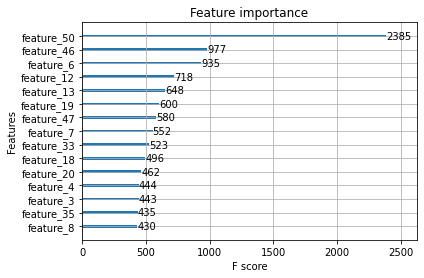

In [49]:
xgb.plot_importance(bst, max_num_features=15)

In [50]:
test_df['xgb_test_preds'] = bst.predict(dtest)

In [51]:
test_df.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_32,feature_33,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_42,feature_43,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,target,rf_test_preds,xgb_test_preds
49008,4084,110.0,77.66,0.494997,0.000000,209.00,0.0,0.201109,141.82,35.0,3.27,183.28,77.66,0.181976,0.002610,0.0,0.0,0.000000,0.838393,174.50,0.226795,75.00,2.66,77.66,9.0,0.0,0,20.0,3.27,32.58,60.0,29.0,44.0,0.032862,0.000000,62.53,0.0,0.0,0.10,0.87,-0.000000,0.0,3.0,0.035053,31.0,120.75,2.0,11,NaN,0.060000,0.025687
49009,4084,110.0,161.86,0.448919,0.000000,193.65,0.0,0.167043,114.73,36.0,1.30,160.38,161.86,0.207897,0.004074,0.0,0.0,16181.098369,0.209477,154.73,0.226795,150.00,11.86,161.86,-8.0,0.0,0,24.0,0.00,33.35,165.0,32.0,47.0,0.045954,0.000000,43.25,0.0,0.0,6.65,1.69,-0.000000,0.0,2.0,0.037252,29.0,117.13,1.0,11,NaN,0.086667,0.026143
49010,4084,110.0,85.00,0.385688,0.000000,130.27,0.0,0.161869,263.30,152.0,5.30,122.10,85.00,0.255406,0.005041,1.0,0.0,1.000000,0.626729,275.05,0.226795,80.00,5.00,85.00,11.0,1.0,0,40.0,0.00,11.75,100.0,51.0,61.0,0.062920,0.000000,28.30,0.0,0.0,0.00,2.87,0.000000,1.0,1.0,0.013951,151.0,93.80,2.0,11,NaN,0.113333,0.021838
49011,4084,110.0,78.00,0.365817,0.000000,157.03,0.0,0.156286,787.50,215.0,1.38,148.10,78.00,0.280130,0.005876,0.0,0.0,0.000000,0.618390,804.75,0.226795,75.00,3.00,78.00,3.0,0.0,0,27.0,0.00,17.25,85.0,30.0,57.0,0.075233,0.000000,5.63,0.0,0.0,0.00,7.55,0.000000,0.0,1.0,0.005658,214.0,142.47,1.0,11,NaN,0.103333,0.014313
49012,4084,110.0,85.08,0.105262,2041.945145,67.42,0.0,0.113863,430.43,126.0,10.72,51.70,85.08,0.355205,0.042197,0.0,8.0,1.000000,0.260960,459.53,0.226795,75.08,10.00,85.08,5.0,1.0,0,32.0,0.00,29.10,85.0,37.0,62.0,0.359863,2040.800154,3.73,0.0,0.0,0.00,5.00,0.056302,1.0,5.0,0.006493,121.0,47.97,3.0,11,NaN,0.120000,0.039906


In [52]:
test_preds['xgb_test_preds'] = test_df[['id', 'xgb_test_preds']].groupby('id').mean().sort_values(by='id')

In [53]:
test_preds

,rf_test_preds,xgb_test_preds
id,,
4084,0.086389,0.032540
4085,0.157222,0.141798
4086,0.123889,0.077989
4087,0.253056,0.267936
4088,0.371944,0.158242
...,...,...
5101,0.104444,0.047725
5102,0.577222,0.598029
5103,0.146111,0.132577


(array([137., 142., 122., 131.,  96.,  63.,  57.,  57.,  43.,  44.,  30.,
         17.,  14.,  15.,  13.,  11.,  10.,   7.,   8.,   5.]),
 array([8.1116590e-04, 4.9541600e-02, 9.8272040e-02, 1.4700247e-01,
        1.9573291e-01, 2.4446334e-01, 2.9319379e-01, 3.4192422e-01,
        3.9065465e-01, 4.3938509e-01, 4.8811552e-01, 5.3684598e-01,
        5.8557642e-01, 6.3430685e-01, 6.8303728e-01, 7.3176771e-01,
        7.8049815e-01, 8.2922858e-01, 8.7795901e-01, 9.2668945e-01,
        9.7541988e-01], dtype=float32),
 <BarContainer object of 20 artists>)

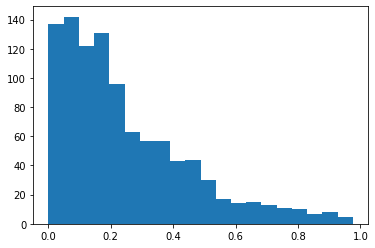

In [54]:
plt.hist(test_preds['xgb_test_preds'], bins=20)

In [55]:
ens = (test_preds['rf_test_preds'] + test_preds['xgb_test_preds'])/2

In [56]:
pd.DataFrame(zip(test_preds.index, ens), columns=['id', 'score']).to_csv('StepanenkoViktor_test.csv', index=False)

In [57]:
solution=pd.read_csv('StepanenkoViktor_test.csv')

In [58]:
solution

,id,score
0,4084,0.059465
1,4085,0.149510
2,4086,0.100939
3,4087,0.260496
4,4088,0.265093
...,...,...
1017,5101,0.076085
1018,5102,0.587625
1019,5103,0.139344
1020,5104,0.173950


(array([ 68., 107., 126., 111., 128.,  87.,  70.,  64.,  54.,  51.,  35.,
         30.,  17.,  16.,  17.,  13.,  12.,   7.,   5.,   4.]),
 array([0.00849906, 0.05199669, 0.09549432, 0.13899195, 0.18248958,
        0.22598721, 0.26948484, 0.31298247, 0.3564801 , 0.39997773,
        0.44347536, 0.48697299, 0.53047062, 0.57396825, 0.61746588,
        0.66096351, 0.70446114, 0.74795877, 0.7914564 , 0.83495403,
        0.87845166]),
 <BarContainer object of 20 artists>)

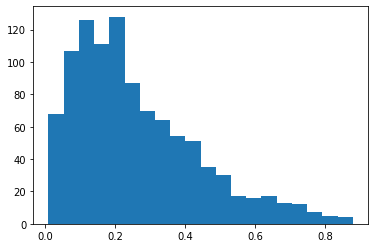

In [59]:
plt.hist(solution['score'],bins=20)